# Analysing Global Protests and Democracy since 1990

## Introduction
This project will explore a set of two datasets related to protest and democracy. This project aggregates information from two distinct datasets, offering a rich, multidimensional perspective on mass mobilization and socio-political conditions. It is a valuable resource for analyzing trends, identifying patterns, and exploring correlations between protests and various socio-economic and political factors.

## Importing Libraries
****
To begin, we'll start by importing our the libraries we'll likely need for this project.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Set 1: Mass Mobilisation
I'll now read in the first data set I want to examine, mass mobilisation. We will read this from CSV.

In [3]:
massmob_path = "data/massmobilisation.csv"
massmob_df = pd.read_csv(massmob_path)

# We'll use Boolean Indexing to clean up the data (source: https://www.geeksforgeeks.org/boolean-indexing-in-pandas/)
massmob_mask = (massmob_df['protest'] != 0) & (massmob_df['year'] != 2020)
massmob_df = massmob_df[massmob_mask]

print(massmob_df.head())



          id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand4   stateresponse1  \
0      15.0         1.0     1990.0  ...               NaN           ignore   
1      25.0         6.0     1990.0  ...               NaN           ignore   
2       1.0         7.0     1990.0  ...               NaN           ignore   
3      12.0         7.0     1990.0  ...               NaN     accomodation   
4      14.0         8.0     1990.0  ...               NaN  crowd dispersal   

   stateresponse2  stateresponse3 stateresponse4 stateresponse5  \
0      

## Global Protests per Year
***
The first data point I will look at is the number of protests globally per year, from 1990 to 2019.

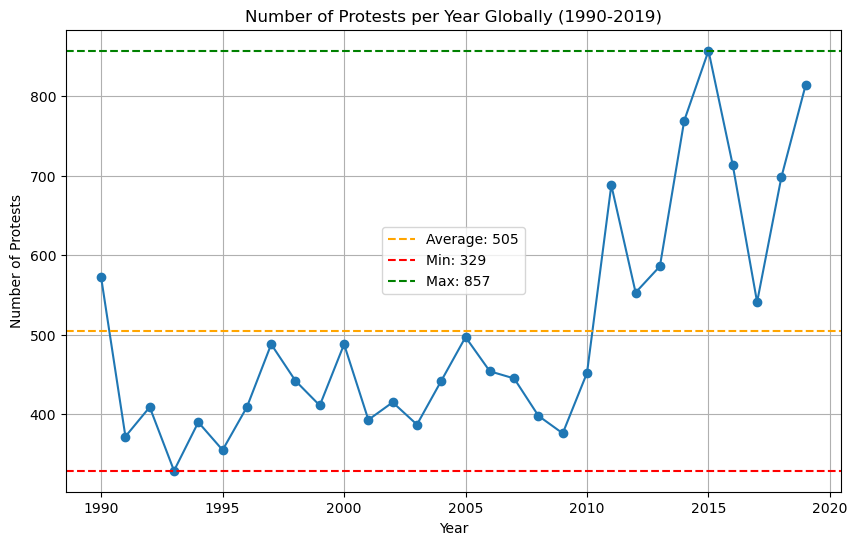

In [4]:
# Starting by grouping the data by year (Source: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/).
yeargrouped = massmob_df.groupby('year')
# We then want to get the number of protests for each group by counting the rows.
protests_per_year = yeargrouped.size().reset_index(name='num_protests')
# .size() returns the number of rows in a Pandas series; this places the year as the index, so in order to carry out essential pandas operations later, we need to use .reset_index to transform the series into a Data Frame, with columns for year and number of protests. (Source: https://favtutor.com/articles/convert-pandas-series-to-dataframe/).

plt.figure(figsize=(10, 6))
plt.plot(protests_per_year['year'], protests_per_year['num_protests'], marker='o')
plt.title('Number of Protests per Year Globally (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

avgyearlyprotests = protests_per_year['num_protests'].mean()
minyearlyprotests = protests_per_year['num_protests'].min()
maxyearlyprotests = protests_per_year['num_protests'].max()

plt.axhline(y=avgyearlyprotests, color='orange', linestyle='--', label=f'Average: {avgyearlyprotests:.0f}') # added ":.0f" because a fraction of a protest doesn't make much sense (source: https://www.datacamp.com/tutorial/python-round-to-two-decimal-places)
plt.axhline(y=minyearlyprotests, color='red', linestyle='--', label=f'Min: {minyearlyprotests}')
plt.axhline(y=maxyearlyprotests, color='green', linestyle='--', label=f'Max: {maxyearlyprotests}')

plt.grid()
plt.legend()
plt.show()



The plot above illustrates that the 1990s and 2000s were relatively stable in terms of global sociopolitical movements. However, the 2010s saw a dramatic rise in protests, coinciding with major events such as the Arab Spring and the surge in climate-related demonstrations in the West. The year with the fewest recorded protests was 1993, with 329 events, while 2015 stands out as a peak year of mass mobilisation, with 857 protests globally. From 1990 to 2019, the average annual number of protests was 505. However, this figure is significantly influenced by the high activity of the 2010s, as yearly protest counts only surpassed this average once prior to 2011. Interestingly, that exception was 1990, a year marked by the dissolution of the USSR and the fall of communism in Europe, which triggered widespread protests.

## Reasons for Protest
Having looked at the numbers of protests over this period, let's look at the main categories of demands made by protesters and visualise them using a pie chart.

              protesterdemand1  num_protests
0           labor wage dispute          1704
1              land farm issue           466
2             police brutality           817
3  political behavior, process          9614
4  price increases, tax policy          1086
5        removal of politician          1004
6          social restrictions           451


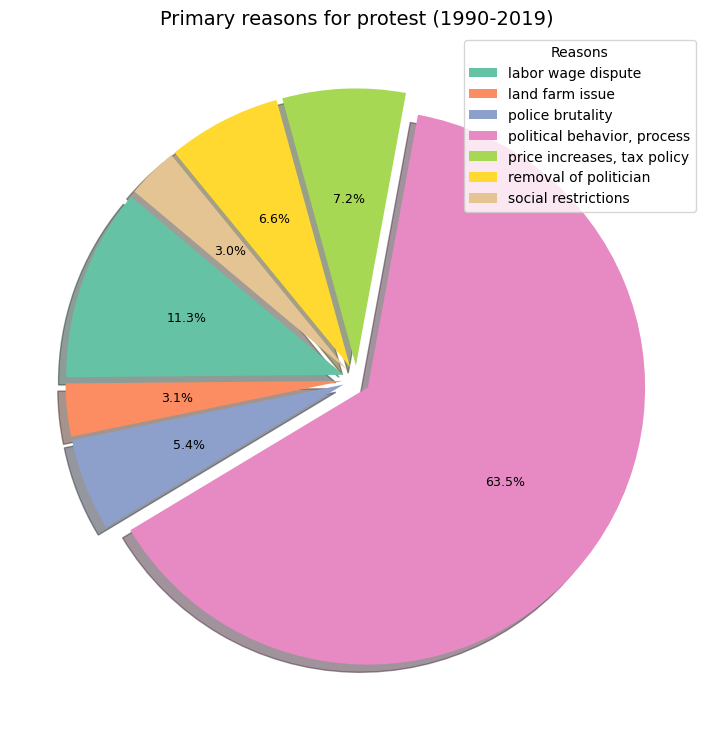

In [6]:
reasongrouped = massmob_df.groupby('protesterdemand1')
protests_by_reason = reasongrouped.size().reset_index(name='num_protests')
print(protests_by_reason)

plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_by_reason['num_protests'], 
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 9},
    colors=sns.color_palette('Set2'),
    shadow = True,
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
    ) # Customisation ideas such as Seaborn's colour palette and 'explode' taken from Proclus Academy (https://proclusacademy.com/blog/customize_matplotlib_piechart/)

plt.title('Primary reasons for protest (1990-2019)', fontsize=14)
plt.legend(wedges, protests_by_reason['protesterdemand1'], title="Reasons", fontsize=10)
plt.show()

Interestingly, political behavior and process has dominated the reasoning behind protests taking place in the previous 3 decades, with 63.5% of all protests placed in this category. Of the other reasons, only 'Labour/wage disputes' surpasses 10%, with 'price increases/tax policy' and 'removal of a politican' following closely behind. 

## Protests per region
Now let's look at how these protests were split from a regional perspective.

            region  num_protests
0           Africa          3164
1             Asia          3099
2  Central America           451
3           Europe          4964
4             MENA          1251
5    North America           520
6          Oceania            38
7    South America          1656


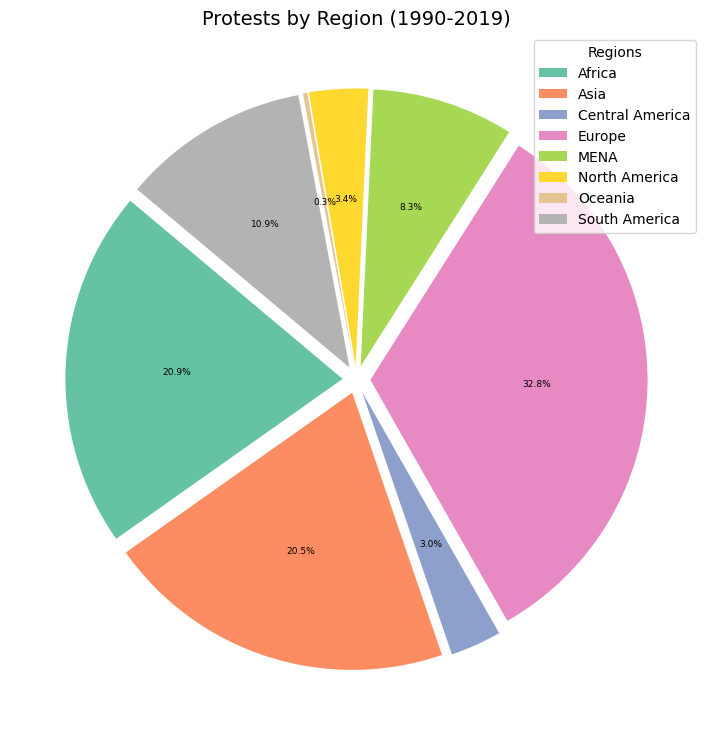

In [7]:
regiongrouped = massmob_df.groupby('region')
protests_per_region = regiongrouped.size().reset_index(name='num_protests')
print(protests_per_region)


plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protests_per_region['num_protests'], 
    autopct='%1.1f%%',
     startangle=140,
    textprops={'fontsize': 6.5},
    colors=sns.color_palette('Set2'),
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
)
plt.title('Protests by Region (1990-2019)', fontsize=14)  # Adjust title font size

# Add legend
plt.legend(wedges, protests_per_region['region'], title="Regions", fontsize=10)  # Adjust legend font size
plt.show()




As we can see above, Europe had the highest proportion of the protests recorded in these 3 decades (32.8%), followed respectively by Africa and Asia (20.9% and 20.5%), with a sizeable proportion also in South America and MENA (Middle East & North Africa).

If we look closer at the data for Europe, we can see which countries were most mobilised. 

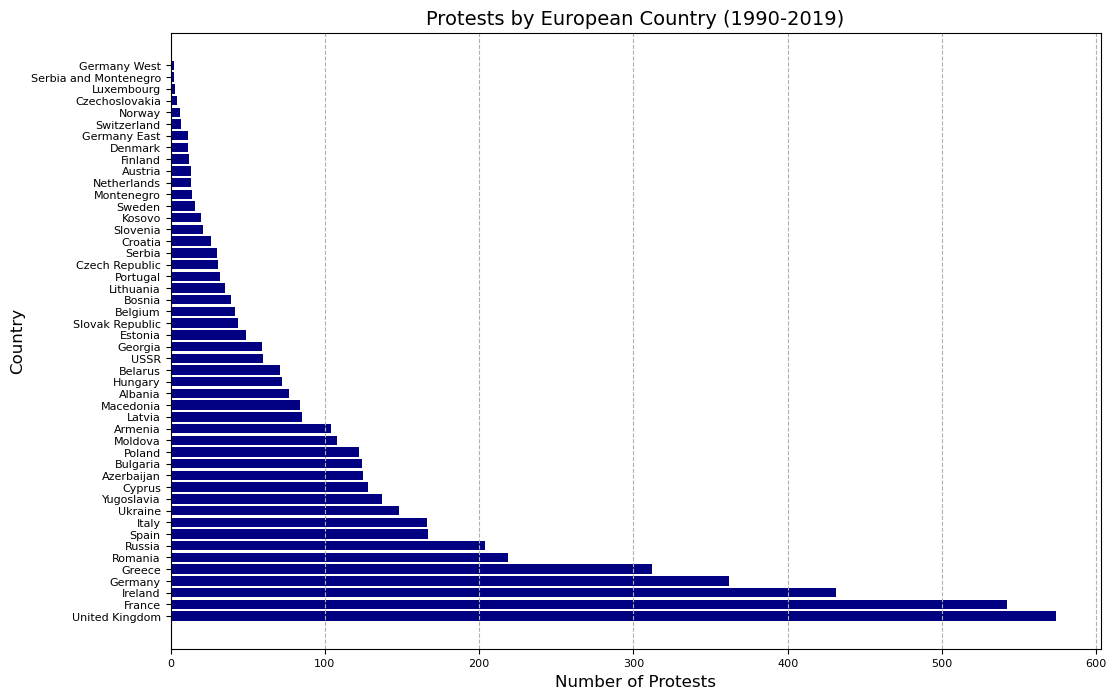

In [8]:
# To do this, I'll filter the data set for just Europe, then group by country.
massmob_df_eu = massmob_df[(massmob_df['region'] == 'Europe')]
europegrouped = massmob_df_eu.groupby('country')
protests_per_country_eu = europegrouped.size().reset_index(name='num_protests')

# I then sort the data by the number of protests for better visualization (Source: https://www.datacamp.com/tutorial/pandas-sort-values?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=726015683493&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=9197253&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-jan25&gad_source=1&gclid=CjwKCAiA7Y28BhAnEiwAAdOJUGLgHgAAxvWLYXa8VglE5eQeU_Aek6ssoVyr3tnttGscpmGmLSAicBoC56sQAvD_BwE)
protests_per_country_eu = protests_per_country_eu.sort_values(by='num_protests', ascending=False)

# Since the number of countries is quite large, it may be better to show this as a horizontal bar chart rather than a pie chart.
plt.figure(figsize=(12, 8))
plt.barh(protests_per_country_eu['country'], protests_per_country_eu['num_protests'], color='navy')
plt.title('Protests by European Country (1990-2019)', fontsize=14)
plt.xlabel('Number of Protests', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--') # Information on customising the grid sought from ChatGPT
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()


The data above reveals some intriguing insights.

Firstly, it’s noteworthy that several countries listed no longer exist, such as West Germany, Czechoslovakia, the USSR, and Yugoslavia, among others. A deeper analysis could involve reassigning the data from these nations to their successor states. However, this approach poses challenges, especially for countries like Yugoslavia, which fragmented into seven successor nations.

Secondly, one might expect the number of protests to generally align with a country’s population size. This is evident to some extent, as nations like the United Kingdom, France, and Germany feature prominently at the top of the list. Yet, there are notable outliers, such as Ireland, which ranks third in protest numbers during this period despite having a much smaller population compared to countries like Germany.

Let’s now narrow our focus to Ireland to explore potential trends in greater detail.

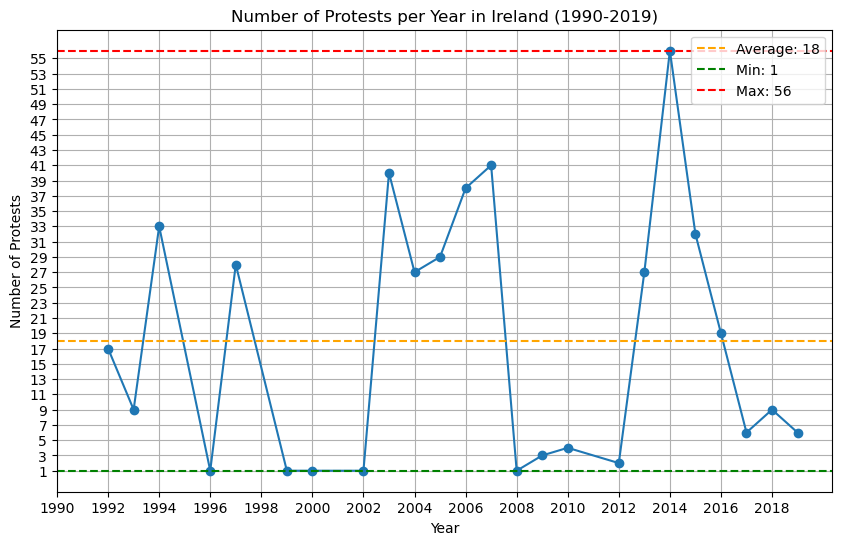

In [17]:
massmob_ie = massmob_df[massmob_df['country'] == 'Ireland']
yeargrouped_ie = massmob_ie.groupby('year')
protests_per_year_ie = yeargrouped_ie.size().reset_index(name='num_protests')

avg_ie = protests_per_year_ie['num_protests'].mean()
min_ie = protests_per_year_ie['num_protests'].min()
max_ie = protests_per_year_ie['num_protests'].max()

plt.figure(figsize=(10, 6))
plt.plot(protests_per_year_ie['year'], protests_per_year_ie['num_protests'], marker='o')
plt.title('Number of Protests per Year in Ireland (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Protests')

y_ticks = range(1, int(max_ie) + 1, 2) # The 
plt.yticks(y_ticks)
x_ticks = range(1990, 2019, 2)
plt.xticks(x_ticks)

plt.axhline(y=avg_ie, color='orange', linestyle='--', label=f'Average: {avg_ie:.0f}')
plt.axhline(y=min_ie, color='green', linestyle='--', label=f'Min: {min_ie}')
plt.axhline(y=max_ie, color='red', linestyle='--', label=f'Max: {max_ie}')

plt.grid()
plt.legend()
plt.show()

Looking at the data, I'm interested to know what were the factors in play in 2014 that led to 56 protests taking place, more than double the previous year.


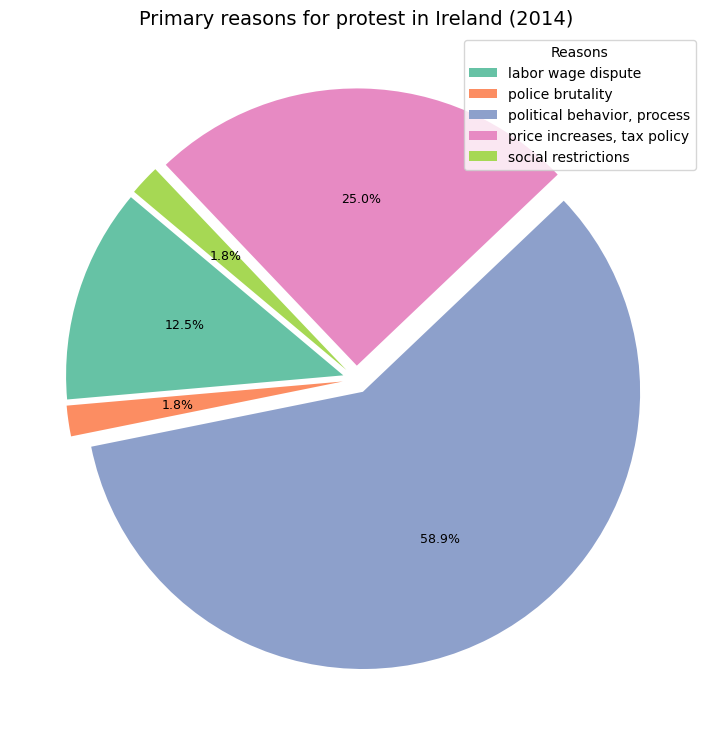

In [42]:
massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]
protestreasons_ie_2014 = massmob_ie_2014.groupby(['protesterdemand1']).size().reset_index(name='num_protests')

# Plot pie chart
plt.figure(figsize=(15, 9))
wedges, texts, autotexts = plt.pie(
    protestreasons_ie_2014['num_protests'], 
    autopct='%1.1f%%',
     startangle=140,
    textprops={'fontsize': 9},
    colors=sns.color_palette('Set2'),
    explode=[0.05, 0.05, 0.05, 0.05, 0.05]
)
plt.title('Primary reasons for protest in Ireland (2014)', fontsize=14)

# Add legend
plt.legend(wedges, protestreasons_ie_2014['protesterdemand1'], title="Reasons", fontsize=10)
plt.show()


Let's break it up some more by looking at the participants in 

## Introducing a second data set: V-Dem Scores

In [ ]:
vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.
vdem_df = vdem_df[(vdem_df['year'] >= 1990) & (vdem_df['year'] <= 2019)] # I only want to include the years that we also have in the Mass Mobilisation data set.
print(vdem_df.head())
print(vdem_df.columns)


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_19582/1161411086.py:2: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip') # after problems with Github's size limits, I decided to compress the csv.


    country_name country_text_id  country_id  year historical_date  project  \
201       Mexico             MEX           3  1990      1990-12-31        0   
202       Mexico             MEX           3  1991      1991-12-31        0   
203       Mexico             MEX           3  1992      1992-12-31        0   
204       Mexico             MEX           3  1993      1993-12-31        0   
205       Mexico             MEX           3  1994      1994-12-31        0   

     historical               histname  codingstart  codingend  ...  \
201           1  United Mexican States         1789       2023  ...   
202           1  United Mexican States         1789       2023  ...   
203           1  United Mexican States         1789       2023  ...   
204           1  United Mexican States         1789       2023  ...   
205           1  United Mexican States         1789       2023  ...   

     e_mipopula  e_miurbani  e_pefeliex    e_wb_pop  e_pechmor  e_miinteco  \
201   84913.650     

## Number of Protests vs Liberal Democracy Index (Ireland)
Given that dissatisfaction with political behavior and process was seen as the biggest factor in protests in Ireland in recent years, I'd like to see the correlation between the number of protests and the level of Liberal Democracy.

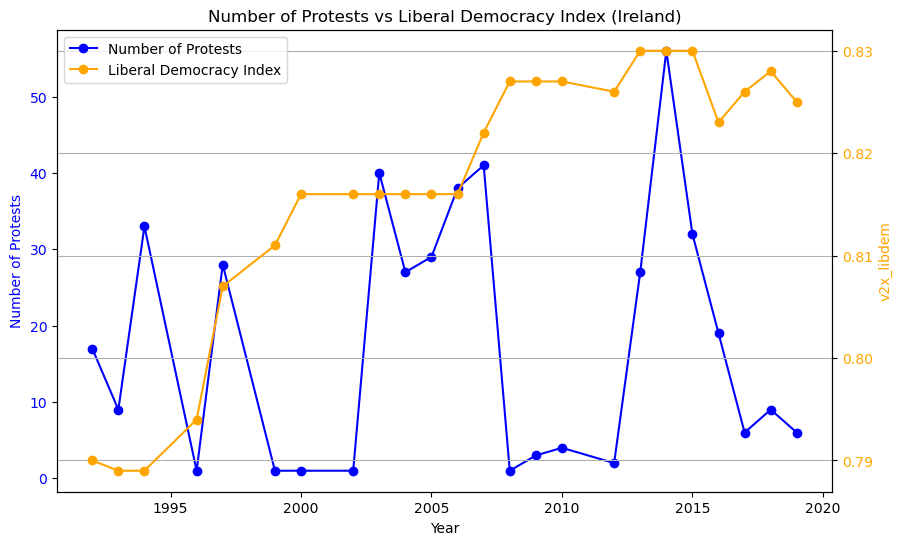

Pearson correlation coefficient: 0.05


In [22]:
vdem_ie = vdem_df[vdem_df['country_name'] == 'Ireland']
vdem_libdem_ie = vdem_ie[['year', 'v2x_libdem']]

massmob_ie_2014 = massmob_ie[massmob_ie['year'] == 2014]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_ie, vdem_libdem_ie, on='year', how='inner')


fig, ax1 = plt.subplots(figsize=(10, 6))

# Axis 1: Number of Protests
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Axis 2: Liberal Democracy Index
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('v2x_libdem', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and grid
plt.title('Number of Protests vs Liberal Democracy Index (Ireland)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")




Examining the Pearson correlation coefficient of +0.05, there appears to be little to no correlation between the number of protests and Ireland's Liberal Democracy Index. However, it is notable that the year with the highest number of protests coincides with the year Ireland achieved its highest Liberal Democracy Index score. This could suggest that during that period, citizens felt particularly empowered to push for change.

In a relatively stable country like Ireland, significant fluctuations in the Liberal Democracy Index are unlikely. To explore a more dynamic case, let’s turn to Turkey, a nation that has experienced considerable political turmoil over the past 30 years. Under President Erdoğan’s increasingly authoritarian rule over the past two decades, we would expect to see a sharp decline in Turkey’s Liberal Democracy Index. Let’s investigate how this shift has influenced the number of protests.


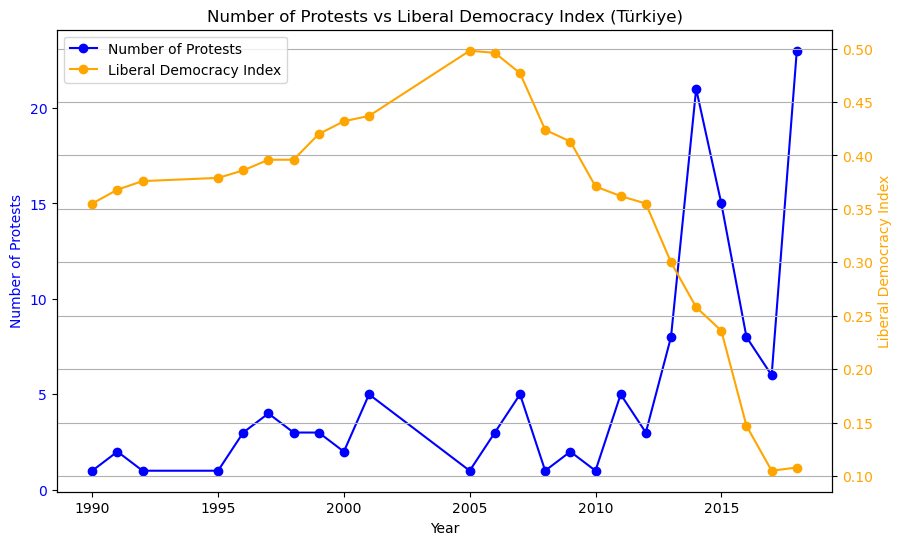

Pearson correlation coefficient: -0.68


In [24]:
massmob_tr = massmob_df[massmob_df['country'] == 'Turkey']
yeargrouped_tr = massmob_tr.groupby('year')

# Count the number of protests for each year
protests_per_year_tr = yeargrouped_tr.size().reset_index(name='num_protests')

vdem_tr = vdem_df[vdem_df['country_name'] == 'Türkiye']
vdem_libdem_tr = vdem_tr[['year', 'v2x_libdem']]

# Merge datasets on 'year'
merged_df = pd.merge(protests_per_year_tr, vdem_libdem_tr, on='year', how='inner')

# Plot the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axis 1: Number of Protests
ax1.plot(
    merged_df['year'],
    merged_df['num_protests'],
    color='blue',
    marker='o',
    label='Number of Protests'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Protests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Axis 2: Libreral Democracy Index
ax2 = ax1.twinx()
ax2.plot(
    merged_df['year'],
    merged_df['v2x_libdem'],
    color='orange',
    marker='o',
    label='Liberal Democracy Index'
)
ax2.set_ylabel('Liberal Democracy Index', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Number of Protests vs Liberal Democracy Index (Türkiye)')
plt.grid()

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.show()

correlation = merged_df['num_protests'].corr(merged_df['v2x_libdem'])
print(f"Pearson correlation coefficient: {correlation:.2f}")

The data above reveals a relatively strong negative correlation between the number of protests and the level of liberal democracy in Turkey. In simpler terms, as Turkey has become less democratic, the number of protests has tended to increase. This trend suggests a public backlash against the erosion of the country's electoral and judicial institutions.

## Number of Protests vs Freedom of Expression


I now plan to analyze the correlation between the number of protests in each country and its average Freedom of Expression score. To ensure a balanced and geographically diverse sample, I asked ChatGPT to provide a list of 20 countries with populations falling within a narrow range. The selected countries all have populations between 25 and 35 million, and they are distributed fairly evenly across different regions of the world.

In [ ]:
samplecountries = ['Peru','Venezuela','Morocco','Ghana','Angola','Uzbekistan','Iraq','Saudi Arabia','Nepal','Malaysia','Mozambique','Yemen','South Korea','Ukraine','Colombia','Tanzania','North Korea','Kenya','Argentina','Algeria']

# Filter the datasets for the sample countries (again, I've used boolean indexing, with .isin() function used to filter the data set for my sample countries)
protests_sample = massmob_df[massmob_df['country'].isin(samplecountries)]
vdem_samplecountries = vdem_df[vdem_df['country_name'].isin(samplecountries)]

total_protests_sample = protests_sample.groupby('country').size().reset_index(name='total_protests')
avg_freexp_sample = vdem_samplecountries.groupby('country_name')['v2x_freexp'].mean().reset_index(name='avg_freedom_of_expression')

# Here I need to changes the column name 'country' to 'country_name' in the total_protests_sample data frame to match the naming conventions of the v-dem set. This will also me to merge the two sets.
# The 'inplace=True' parameter ensures the renaming is made to the original data frame.
total_protests_sample.rename(columns={'country': 'country_name'}, inplace=True)

# To merge the two data sets, I used the .merge() function from pandas, which takes in the two data frames plus the matching column. For each matching value in country_name, the corresponding rows from both DataFrames are combined.
combined_sample = pd.merge(total_protests_sample, avg_freexp_sample, on='country_name')

print(combined_sample)



    country_name  total_protests  avg_freedom_of_expression
0        Algeria             105                   0.581367
1         Angola              24                   0.370600
2      Argentina             114                   0.922333
3       Colombia             139                   0.731867
4          Ghana              66                   0.833633
5           Iraq             123                   0.283433
6          Kenya             350                   0.691300
7       Malaysia             147                   0.396367
8        Morocco              40                   0.454667
9     Mozambique              75                   0.688367
10         Nepal             213                   0.811467
11   North Korea               8                   0.012667
12          Peru             166                   0.729200
13  Saudi Arabia              21                   0.122433
14   South Korea             345                   0.877267
15      Tanzania              37        

Now let's plot this data in a scatter plot, and use Numpy's polyfit to look at the correlation between protest numbers and average freedom of expression scores.

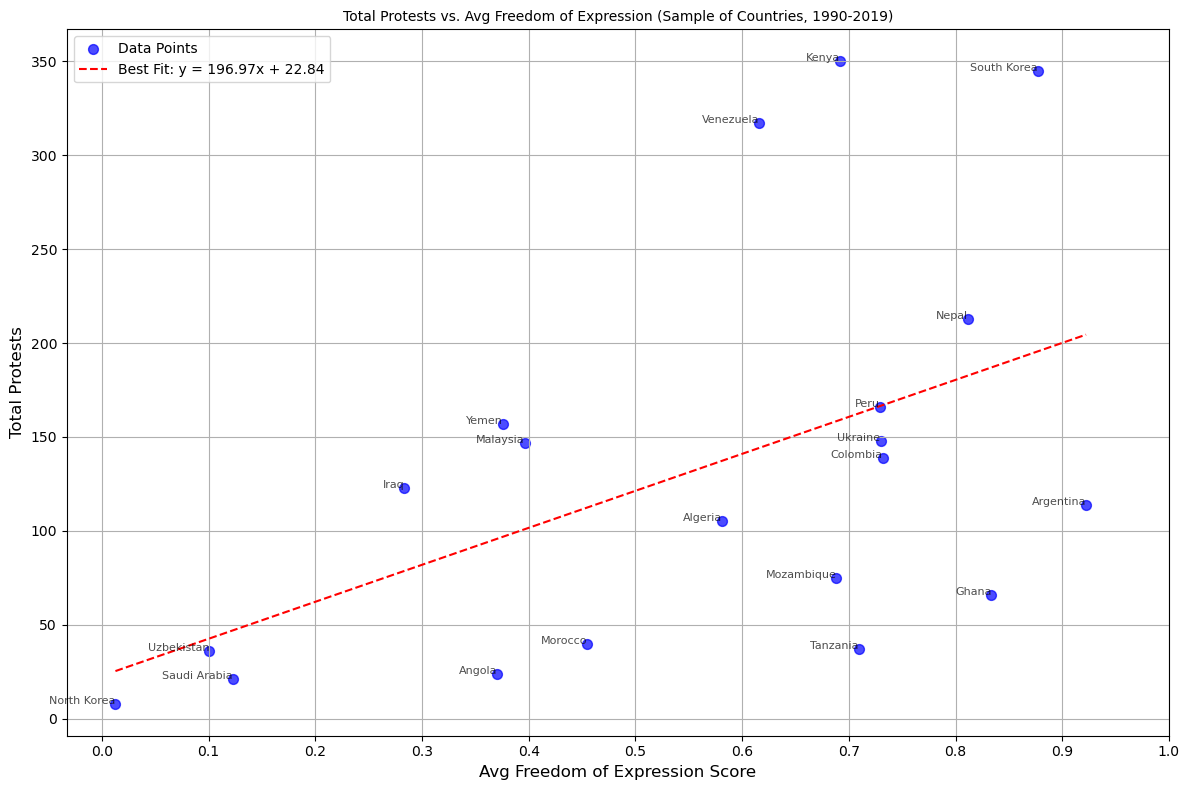

Pearson correlation coefficient: 0.5078381427393297


In [25]:

# Extract x and y values from combined_sample
x = combined_sample['avg_freedom_of_expression']
y = combined_sample['total_protests']

# Fit a linear regression line using NumPy's polyfit
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)

# Generate y values for the line of best fit
x_line = np.linspace(x.min(), x.max(), 100)
y_line = line(x_line)


plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Data Points', s=50, alpha=0.7)
plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Best Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add country names as labels on the scatter plot
for i, row in combined_sample.iterrows():
    plt.text(row['avg_freedom_of_expression'], row['total_protests'], row['country_name'], fontsize=8, ha='right', alpha=0.7)

# Titles, labels, and legend
plt.title('Total Protests vs. Avg Freedom of Expression (Sample of Countries, 1990-2019)', fontsize=10)
plt.xlabel('Avg Freedom of Expression Score', fontsize=12)
plt.ylabel('Total Protests', fontsize=12)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
corr = x.corr(y)
print(f"Pearson correlation coefficient: {corr}")


With a Pearson correlation coefficient of 0.51, we can establish that there is a moderate correlation between a country's freedom of expression score and the number of protests they experience. Freedom of Expression is notoriously limited in North Korea, and the low number of protests reflects this. Its Southern neighbour, South Korea, on the other hand, has a relatively high freedom of expression score, and its large number of protests reflects the ability of citizens to make their voices heard. Peru is the closest country in the sample to the best fit line, meaning that it's closest to the model we've created.

## Conclusion


## Considerations/improvements for further research
If conducting this research further, there are a number of improvements I would make to make the research more efficient and to get more meaningful results from my data.

### Incorporating SQLite3.
One challenge I came across with this project was the size of the V-dem dataset. Due to the sheer size of the CSV, I had to compress the file before working with it. This is one of the main reasons why using a database can be more efficient. Here is how I could incorporate this:

In [35]:
import sqlite3

vdem_path = "/Users/myleshenehan/Downloads/Correct-pfda/pfda/project/data/v-dem.csv.gz"
vdem_df = pd.read_csv(vdem_path, compression='gzip')

# When trying to run this, I got the error "OperationalError: too many columns on vdem scores". As such, I'd focus on the columns I need.
columns_to_keep = ['year', 'country_name', 'v2x_libdem', 'v2x_freexp']
vdem_df_subset = vdem_df[columns_to_keep]

# We can connect to SQLite and create the file vdem_data.db
conn = sqlite3.connect("vdem_data.db") 

# We can then save the data frame as a table in SQLite using the ".to_sql() function". 'Index=False prevents the DataFrame's index from being written as a separate column in the database.
vdem_df_subset.to_sql("vdem_scores", conn, index=False)

# Close the connection (commits changes and closes connection to SQLite)
conn.close()


/var/folders/83/p7dxgbn55cn997y66h_vgrr00000gn/T/ipykernel_19582/1010838567.py:4: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem_df = pd.read_csv(vdem_path, compression='gzip')


We can then run some SQL queries. Here are some examples:
1. SELECT * FROM vdem_scores; (to select all data from the vdem_scores table)
2. SELECT year, country, score FROM vdem_scores; (to select specific columns from the vdem_scores table)
3. SELECT * FROM vdem_scores WHERE country_name = 'Ireland'; (to filter by country "Ireland")
4. SELECT * FROM vdem_scores WHERE year = 2014; (to filter by year "2014")

Let's give it a try with the 3rd example.

In [41]:
conn = sqlite3.connect("vdem_data.db")
cursor = conn.cursor()

# Run a SQL query (e.g., selecting all records)
cursor.execute("SELECT * FROM vdem_scores WHERE country_name = 'Ireland'")

# Fetch and print the results
results = cursor.fetchall()
for row in results:
    print(row)

# Close the connection
conn.close()


(1919, 'Ireland', 0.233, 0.611)
(1920, 'Ireland', 0.234, 0.611)
(1921, 'Ireland', 0.32, 0.611)
(1922, 'Ireland', 0.452, 0.621)
(1923, 'Ireland', 0.523, 0.67)
(1924, 'Ireland', 0.606, 0.778)
(1925, 'Ireland', 0.61, 0.778)
(1926, 'Ireland', 0.613, 0.778)
(1927, 'Ireland', 0.618, 0.778)
(1928, 'Ireland', 0.63, 0.778)
(1929, 'Ireland', 0.633, 0.778)
(1930, 'Ireland', 0.633, 0.778)
(1931, 'Ireland', 0.633, 0.778)
(1932, 'Ireland', 0.642, 0.778)
(1933, 'Ireland', 0.643, 0.778)
(1934, 'Ireland', 0.643, 0.778)
(1935, 'Ireland', 0.647, 0.778)
(1936, 'Ireland', 0.654, 0.778)
(1937, 'Ireland', 0.655, 0.778)
(1938, 'Ireland', 0.647, 0.778)
(1939, 'Ireland', 0.633, 0.767)
(1940, 'Ireland', 0.633, 0.767)
(1941, 'Ireland', 0.633, 0.767)
(1942, 'Ireland', 0.633, 0.767)
(1943, 'Ireland', 0.636, 0.767)
(1944, 'Ireland', 0.639, 0.767)
(1945, 'Ireland', 0.642, 0.791)
(1946, 'Ireland', 0.659, 0.797)
(1947, 'Ireland', 0.659, 0.797)
(1948, 'Ireland', 0.654, 0.797)
(1949, 'Ireland', 0.664, 0.828)
(1950, 'Irel

### Introducing the HDI as a third data set